<h1>Análisis Exploratorio de Datos (EDA) - Análisis Gráfico

En este Notebook se llevará a cabo el análisis técnico correspondiente al EDA de las bases de datos de los sinietros de la ciudad de Buenos Aires, Argentina.

<h2>Importaciones

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
homicidiosHechosDf = pd.read_csv('../data/homicidios_hechos.csv')
homicidiosVictimasDf = pd.read_csv('../data/homicidios_victimas.csv')

In [3]:
sns.set(style='darkgrid',palette='dark')

<h3>Distribución Temporal

Iniciamos con un análisis de la distribución temporal de los homicidios. 

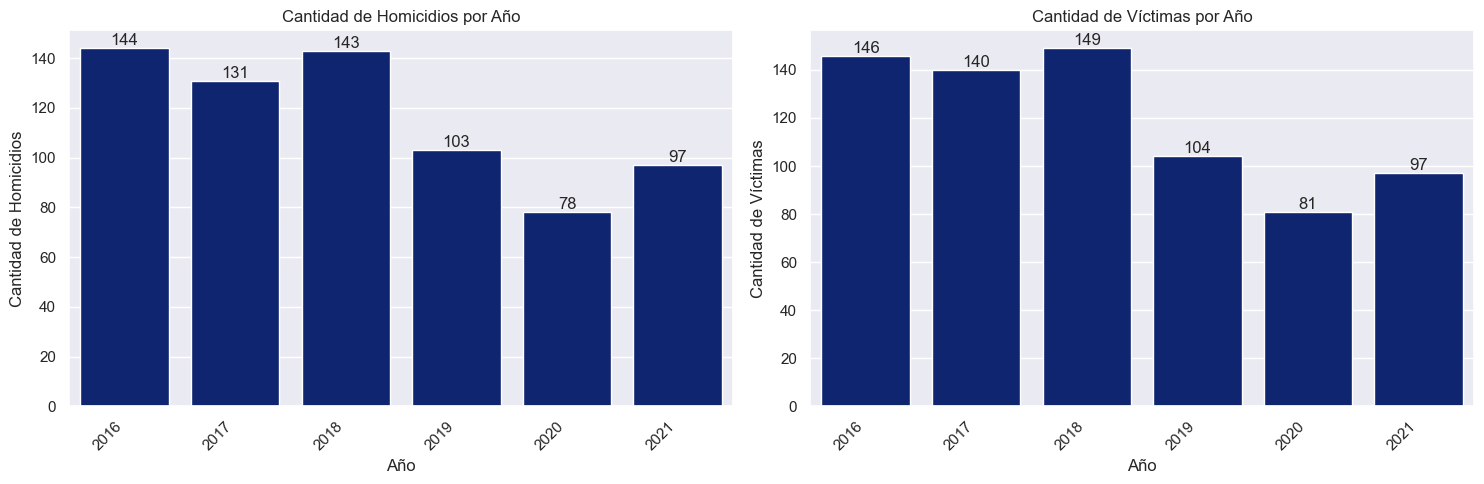

In [15]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
ax = sns.countplot(data = homicidiosHechosDf, x = 'aaaa')
for label in ax.containers:
    ax.bar_label(label)
plt.ylabel('Cantidad de Homicidios')
plt.xlabel('Año')
plt.xticks(rotation=45, ha='right')
plt.title('Cantidad de Homicidios por Año')
plt.subplot(1, 2, 2)
ax = sns.countplot(data = homicidiosVictimasDf, x = 'aaaa')
for label in ax.containers:
    ax.bar_label(label)
plt.ylabel('Cantidad de Víctimas')
plt.xlabel('Año')
plt.xticks(rotation=45, ha='right')
plt.title('Cantidad de Víctimas por Año')
plt.tight_layout()
plt.show()

Al visualizar la gráfica de barras se observa un descenso en la cantidad total de homicidios por año. Esto coincide con la cantidad de víctimas por año, pues fueron pocos los casos en donde se presentó más de una víctima por homicidio. La marcada diferencia entre los años de 2016 a 2018 y los de 2019 a 2021 se le atribuye principalmente a la disminución en la movilidad a causa del COVID 19.

In [16]:
dataHomicidios = (
    homicidiosHechosDf
    .groupby('aaaa')['id_hecho']
    .count()
    .reset_index()
)
dataVictimas = (
    homicidiosVictimasDf
    .groupby('aaaa')['id_hecho']
    .count()
    .reset_index()
)
print(f'El año con mayor número de homicidios fue: {dataHomicidios.sort_values(by="id_hecho", ascending=False).iloc[0, 0]}')
print(f'La media de homicidios por año es de: {np.mean(dataHomicidios["id_hecho"])}')
print(f'El año con mayor número de víctimas fue: {dataVictimas.sort_values(by="id_hecho", ascending=False).iloc[0, 0]}')
print(f'La media de víctimas por año es de: {np.mean(dataVictimas["id_hecho"])}')
print(f'El número de homicidios con más de una víctima fue de: {homicidiosHechosDf[homicidiosHechosDf["n_victimas"] > 1].groupby("aaaa")["id_hecho"].count().sum()}')


El año con mayor número de homicidios fue: 2016
La media de homicidios por año es de: 116.0
El año con mayor número de víctimas fue: 2018
La media de víctimas por año es de: 119.5
El número de homicidios con más de una víctima fue de: 20


Ahora pasamos a ver la distribución de víctimas por mes. Vemos que no existe una tendencia aparente que se repita año con año.

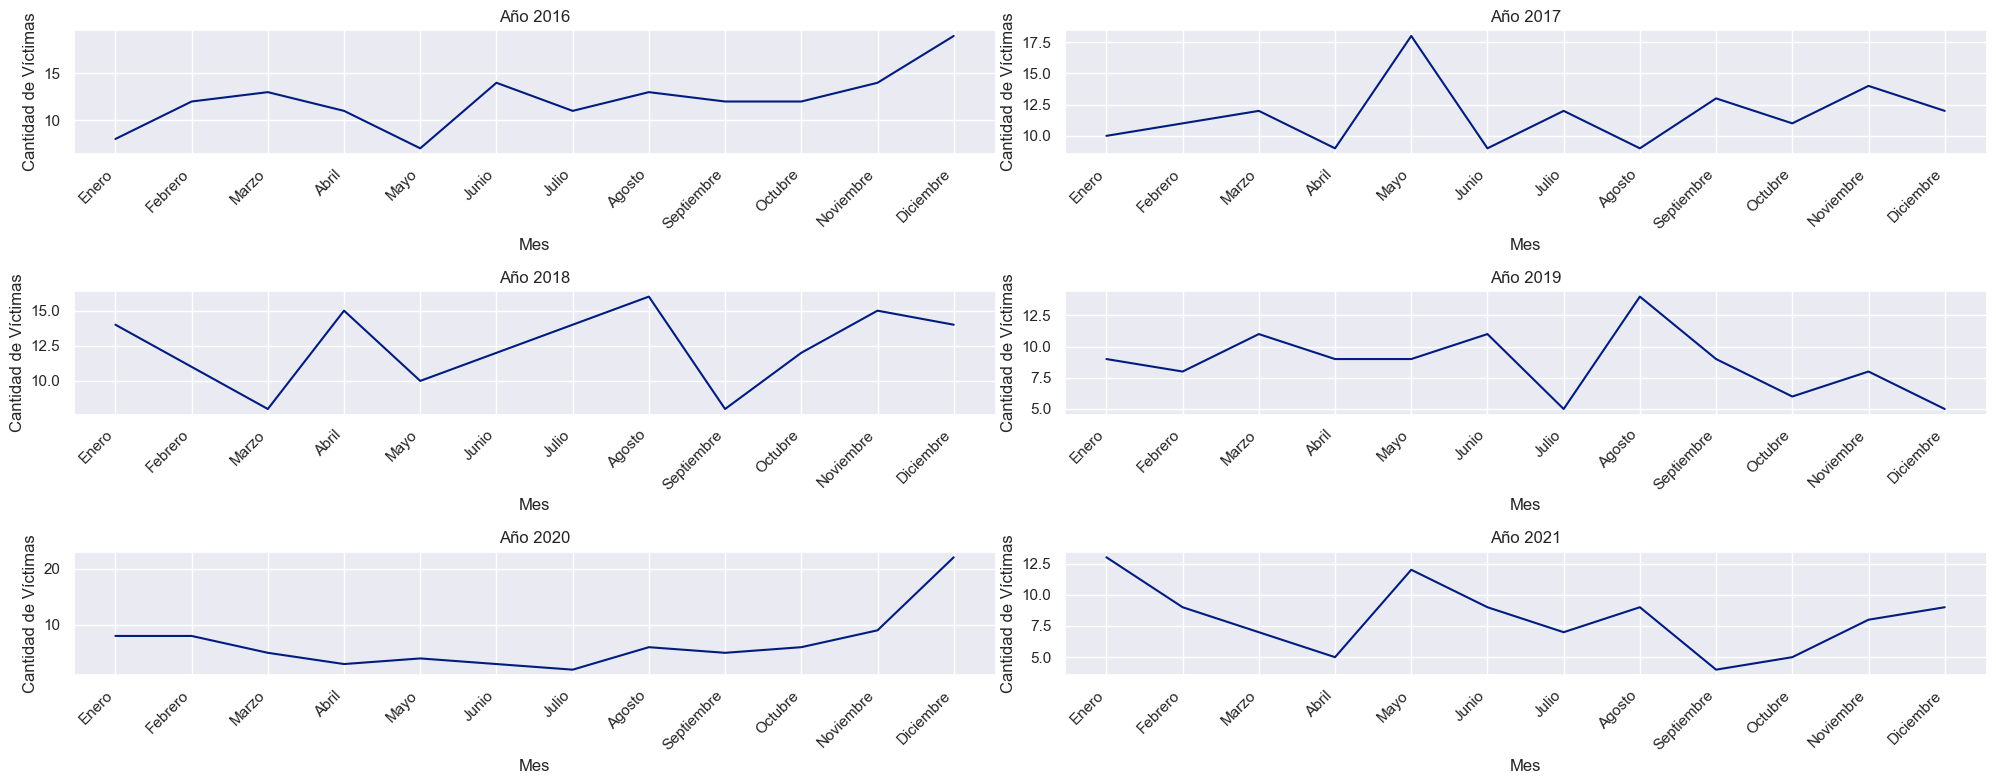

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(20, 8))
for i, year in enumerate(homicidiosHechosDf['aaaa'].unique()):
    months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    fila = i // 2
    columna = i % 2
    homicidiosHechosMensual = (homicidiosHechosDf[homicidiosHechosDf['aaaa'] == year].groupby('mm').agg({'n_victimas':'sum'}))
    homicidiosHechosMensual.index = months
    ax = axes[fila, columna]
    homicidiosHechosMensual.plot(ax=ax, kind='line')
    ax.set_title('Año ' + str(year))
    ax.set_xlabel('Mes')
    ax.set_ylabel('Cantidad de Víctimas')
    ax.legend_.remove()
    ax.set_xticks(range(len(months)))
    ax.set_xticklabels(months, rotation=45, ha='right')
plt.tight_layout()
plt.show()

Si juntamos los datos de todos los años y los agrupamos por mes, podemos ver que existe un pico en el mes de diciembre donde tanto los homicidios como, en consecuencia, las víctimas aumentan aproximadamente 35% con respecto a la media mensual.

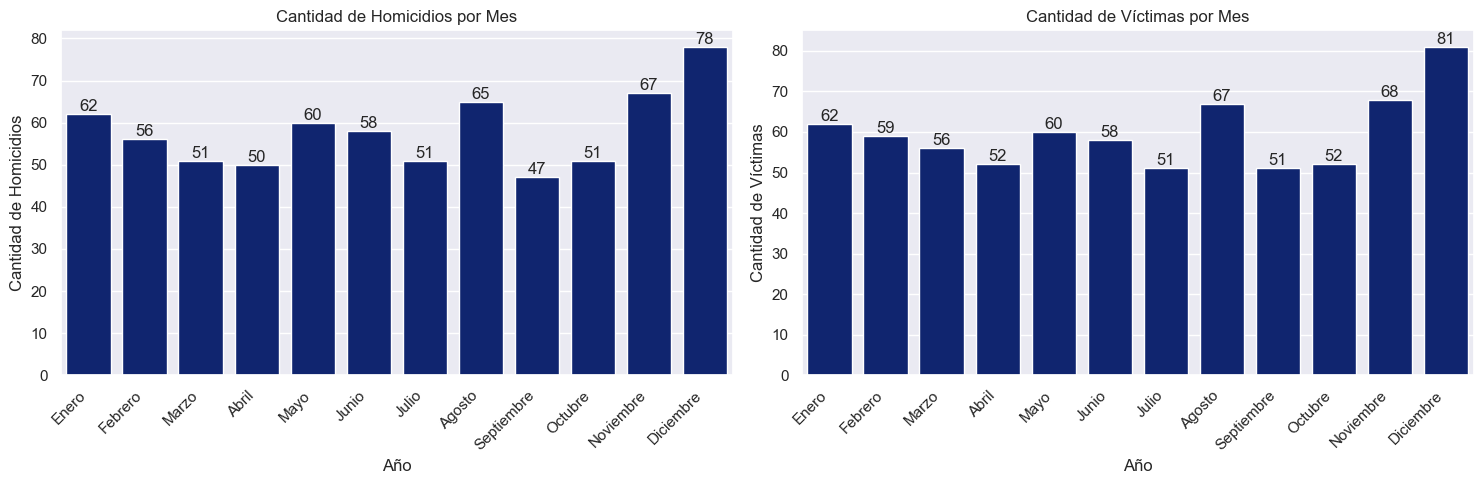

In [18]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
ax = sns.countplot(data = homicidiosHechosDf, x = 'mm')
for label in ax.containers:
    ax.bar_label(label)
plt.ylabel('Cantidad de Homicidios')
plt.xlabel('Año')
plt.xticks(rotation=45, ha='right')
plt.title('Cantidad de Homicidios por Mes')
ax.set_xticklabels(months, rotation=45, ha='right')

plt.subplot(1, 2, 2)
ax = sns.countplot(data = homicidiosVictimasDf, x = 'mm')
for label in ax.containers:
    ax.bar_label(label)
plt.ylabel('Cantidad de Víctimas')
plt.xlabel('Año')
ax.set_xticklabels(months, rotation=45, ha='right')
plt.title('Cantidad de Víctimas por Mes')
plt.tight_layout()
plt.show()

In [19]:
dataHomicidios = (
    homicidiosHechosDf
    .groupby('mm')['id_hecho']
    .count()
    .reset_index()
)
dataVictimas = (
    homicidiosVictimasDf
    .groupby('mm')['id_hecho']
    .count()
    .reset_index()
)
print(f'El mes con mayor número de homicidios tiene: {dataHomicidios.sort_values(by="id_hecho", ascending=False).iloc[0, 1]} homicidios')
print(f'La media de homicidios por mes es de: {np.mean(dataHomicidios["id_hecho"])}')
print(f'El mes con mayor número de víctimas fue: {dataVictimas.sort_values(by="id_hecho", ascending=False).iloc[0, 1]} víctimas')
print(f'La media de víctimas por mes es de: {np.mean(dataVictimas["id_hecho"])}')

El mes con mayor número de homicidios tiene: 78 homicidios
La media de homicidios por mes es de: 58.0
El mes con mayor número de víctimas fue: 81 víctimas
La media de víctimas por mes es de: 59.75


Cuando agrupamos por día, si bien podemos observar una especie de pico los días sábado y lunes, la diferencia con respecto al resto de los días de la semana es demasiado pequeña como para considerarlo relevante. Aproximadamente el 70% de los accidentes ocurren entre semana.

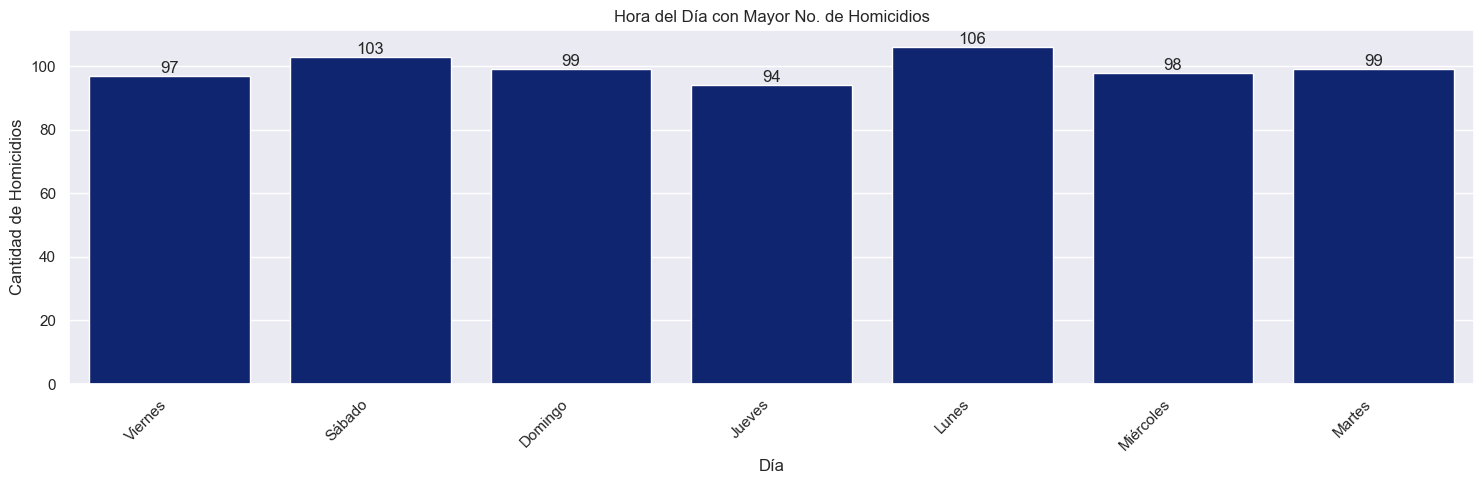

In [20]:
data = (
    homicidiosHechosDf[homicidiosHechosDf['fecha'] != 'SD']['day_name']
    .reset_index()
)
plt.figure(figsize = (15, 5))
ax = sns.countplot(data = data, x = 'day_name')
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cantidad de Homicidios')
plt.xlabel('Día')
plt.title('Hora del Día con Mayor No. de Homicidios')
plt.tight_layout()
plt.show()

Observando la distribución agrupada por hora se puede observar un pico a las 6 y 7 de la mañana, y otro a las 9, lo cual podría explicarse por la cantidad de personas moviéndose a sus trabajos.

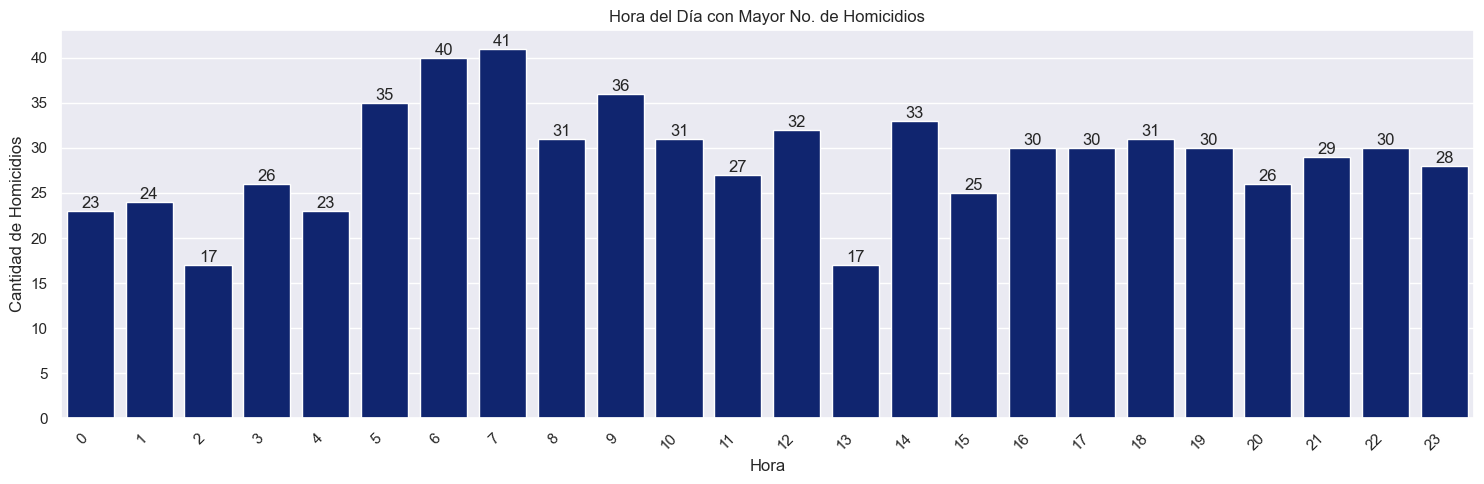

In [21]:
data = homicidiosHechosDf[homicidiosHechosDf['hh'] != 'SD']['hh'].astype(int).round(0).reset_index()
plt.figure(figsize = (15, 5))
ax = sns.countplot(data = data.sort_values('hh'), x = 'hh')
for label in ax.containers:
    ax.bar_label(label)
plt.ylabel('Cantidad de Homicidios')
plt.xlabel('Hora')
plt.xticks(rotation=45, ha='right')
plt.title('Hora del Día con Mayor No. de Homicidios')
plt.tight_layout()
plt.show()

<h3>Distribución de Edades

Ahora pasamos a revisar cómo se distribuyen las edades en las víctimas de homicidios.

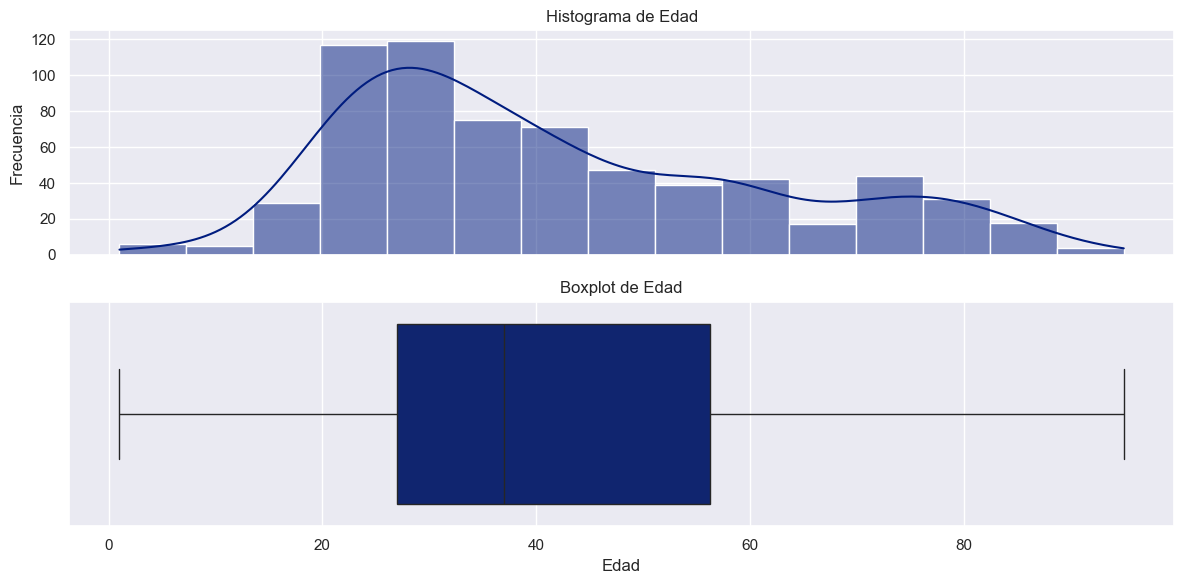

In [22]:
data = homicidiosVictimasDf[homicidiosVictimasDf['edad'] != 'SD']['edad'].astype(int).reset_index()

fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
    
# Se grafica el histograma de la edad
sns.histplot(data['edad'], kde=True, ax=ax[0])
ax[0].set_title('Histograma de Edad')
ax[0].set_ylabel('Frecuencia')
    
# Se grafica el boxplot de la edad
sns.boxplot(x=data['edad'], ax=ax[1])
ax[1].set_title('Boxplot de Edad')
ax[1].set_xlabel('Edad')

# Se ajusta y muestra el gráfico
plt.tight_layout()
plt.show()

En los gráficos previos se evidencia que el 75% de los involucrados en accidentes tienen menos de 55 años, con una mediana de 39 años. No se identifican edades atípicas. Aunque se registra un mínimo de 1 año y un máximo de 95 años, esto se debe al registro de todas las víctimas y no necesariamente a quienes conducían en el momento del accidente. El histograma muestra una distribución ligeramente sesgada hacia la derecha, con la mayor incidencia de accidentes concentrada entre los 20 y 40 años.

In [23]:
stats = data['edad'].describe().round(2)
print(f'La edad media (mediana) de las víctimas es de: {stats[5]}')
print(f'El edad promedio (mean) de las víctimas es de: {round(stats[1],2)}')
print(f'El 75% de las víctimas tienen una edad menor de: {stats[6]}')

La edad media (mediana) de las víctimas es de: 37.0
El edad promedio (mean) de las víctimas es de: 42.17
El 75% de las víctimas tienen una edad menor de: 56.25


Revisando la distribución de las edades agrupadas por año con ayuda de diagramas de cajas, observamos que esta se comporta de manera bastante similar entre todos los años, con un ligero incremento en la media durante el 2020.

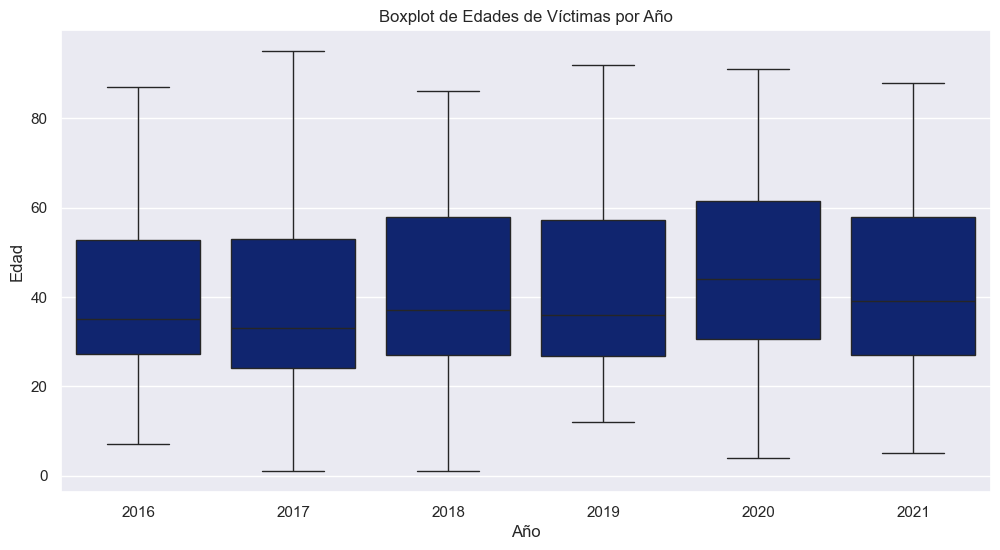

In [24]:
data = (
    homicidiosVictimasDf[
        homicidiosVictimasDf[['aaaa','edad']] != 'SD'
    ][['aaaa','edad']]
    .dropna()
    .astype(int)
    .reset_index()
)

# Se crea el gráfico de boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='aaaa', y='edad', data=data)
    
plt.title('Boxplot de Edades de Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Edad')
     
# Se muestra el gráfico
plt.show()

Al ver la correlación entre la edad de las víctimas y el sexo de las mismas podemos observar un resultado interesante.

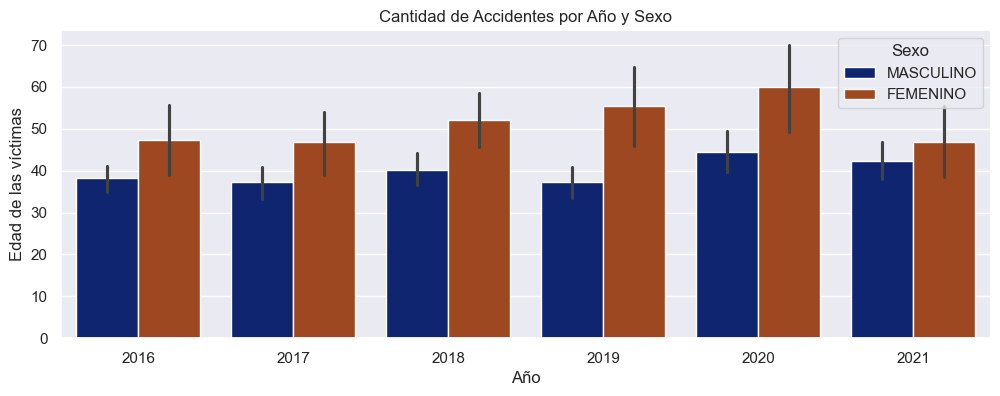

In [25]:
data = (
    homicidiosVictimasDf[
        homicidiosVictimasDf[['aaaa','edad','sexo']] != 'SD'
    ][['aaaa','edad','sexo']]
    .reset_index()
)

data['edad'] = data['edad'].dropna().astype(int).round(0)

plt.figure(figsize=(12, 4))
sns.barplot(x='aaaa', y='edad', hue='sexo', data=data,)
    
plt.title('Cantidad de Accidentes por Año y Sexo')
plt.xlabel('Año') ; plt.ylabel('Edad de las víctimas') ; plt.legend(title='Sexo')
    
# Se muestra el gráfico
plt.show()

Para los hombres, se nota una ligera inclinación al aumento en la edad de fallecimiento, manteniéndose alrededor de los 40 años, no obstante, sigue siendo inferior a la edad de fallecimiento de las mujeres. En el caso de las mujeres, aprecia que hasta el año 2020 existía una tendencia al alza en las edades de las mujeres fallecidas en comparación con los hombres, especialmente en el rango de 40 a 50 años, aunque se observa una disminución en 2021. 

<h3>Distribución Geográfica

A continuación se revisará la distribución de los datos con respecto al tipo de calle donde ocurrieron.

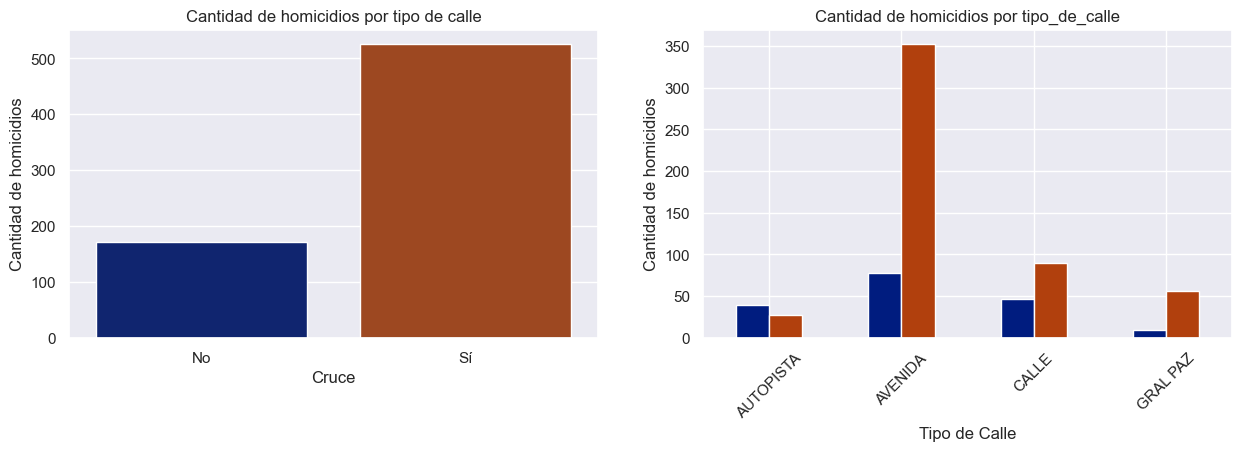

In [15]:
data = homicidiosHechosDf[homicidiosHechosDf[['tipo_de_calle','cruce','victima']] != 'SD']
palette = sns.color_palette('dark')
# palette = [palette[1], palette[0]]

# Se crea el gráfico
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Gráfico 1: sexo
sns.countplot(data=data, x='cruce', ax=axes[0], palette='dark')
axes[0].set_title('Cantidad de homicidios por tipo de calle')
axes[0].set_xlabel('Cruce')
axes[0].set_xticklabels(['No','Sí'])
axes[0].set_ylabel('Cantidad de homicidios')

# Gráfico 2: Rol
dataRol = data.groupby(['tipo_de_calle', 'cruce']).size().unstack(fill_value=0)
dataRol.plot(kind='bar', ax=axes[1], color=palette)
axes[1].set_title('Cantidad de homicidios por tipo_de_calle')
axes[1].set_xlabel('Tipo de Calle')
axes[1].set_ylabel('Cantidad de homicidios')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend().set_visible(False)

Podemos observar que alrededor del 75.43% de los siniestros ocurren en cruces, con una gran cantidad de estos siendo también en avenidas, aproximadamente 62% del gran total. Esto hace sentido teniendo en cuenta que, si bien las autopistas suelen ser los tipos de calle donde los límites de velocidad son mayores, las avenidas cuentan con una mayor cantidad de cruces que dan oportunidad a que se generen situaciones propensas a accidentes. Esto se ve reforzado por el hecho de que las autopistas son el único tipo de calle en donde hay más accidentes que no son en cruces.

<h3>Involucrados

<h4>Relación Víctima-Acusado

A continuación se analizarán los datos de los involucrados, tanto víctimas como acusados.

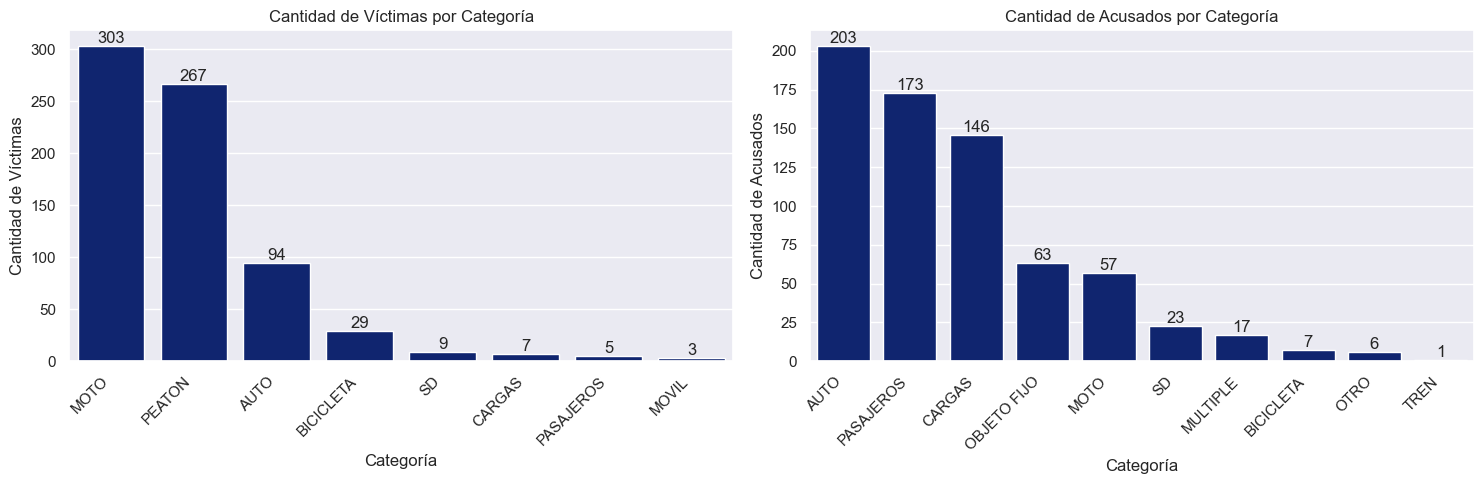

In [26]:
orderA = homicidiosHechosDf['acusado'].value_counts().reset_index()
orderA.columns = ['acusado', 'count']
orderA = orderA.sort_values(by='count', ascending=False)

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 2)
ax = sns.countplot(data = homicidiosHechosDf, x = 'acusado', order=orderA['acusado'])
for label in ax.containers:
    ax.bar_label(label)
plt.ylabel('Cantidad de Acusados')
plt.xlabel('Categoría')
plt.xticks(rotation=45, ha='right')
plt.title('Cantidad de Acusados por Categoría')

orderB = homicidiosHechosDf['victima'].value_counts().reset_index()
orderB.columns = ['victima', 'count']
orderB = orderB.sort_values(by='count', ascending=False)

plt.subplot(1, 2, 1)
ax = sns.countplot(data = homicidiosVictimasDf, x = 'victima', order=orderB['victima'])
for label in ax.containers:
    ax.bar_label(label)
plt.ylabel('Cantidad de Víctimas')
plt.xlabel('Categoría')
plt.title('Cantidad de Víctimas por Categoría')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El gráfico sugiere que los conductores de automóviles son los principales responsables de los incidentes registrados, seguidos por los pasajeros y los vehículos de carga. En este caso llama la atención la cantidad de acusados en la categoría de 'Pasajeros'. De acuerdo con la información que nos proporciona el diccionario se infiere que estos siniestros están asociados a personas abordando o desabordando el transporte público, provocando un accidente en el proceso.

También llama la atención que aproximadamente el 42% de las víctimas eran motociclistas. Esto habla acerca de la vulnerabilidad que este tipo de vehículos enfrenta en accidentes viales, que si bien no es mayor a la de un peatón, sí que presentan un mayor abanico de oportunidades para que se genere un siniestro.

Text(0.5, 1.0, 'Cantidad de Participantes por Categoría')

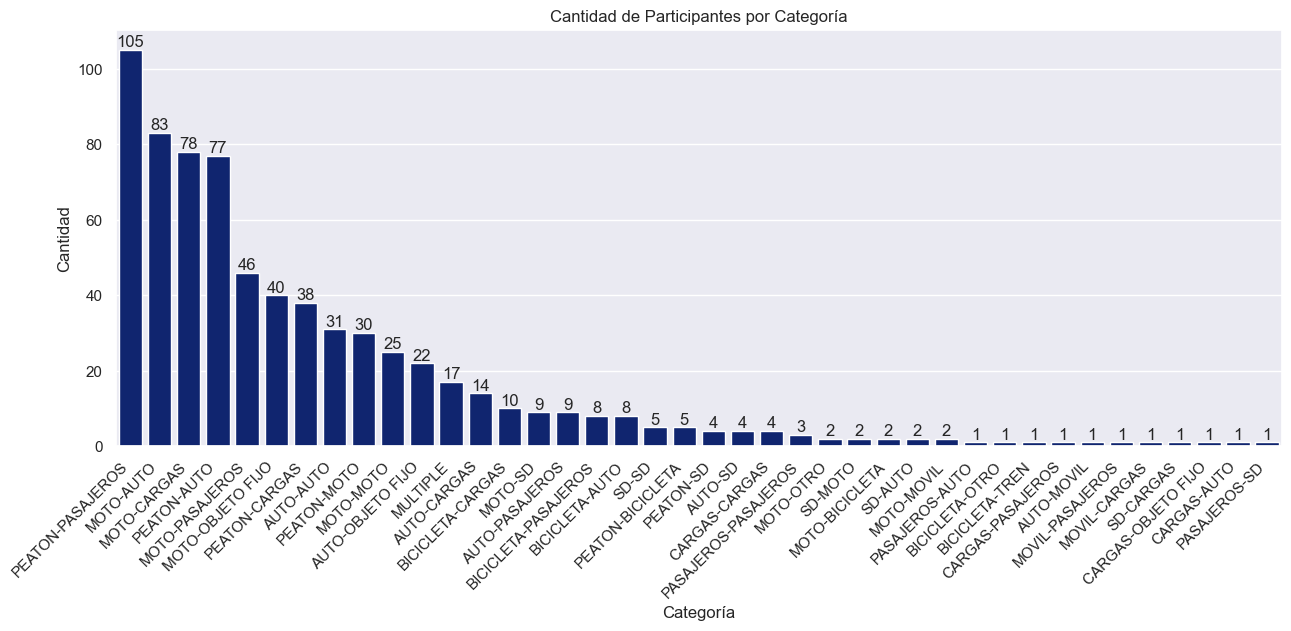

In [27]:
orderA = homicidiosHechosDf['participantes'].value_counts().reset_index()
orderA.columns = ['participantes', 'count']
orderA = orderA.sort_values(by='count', ascending=False)

plt.figure(figsize = (25, 5))
plt.subplot(1, 2, 1)
ax = sns.countplot(data = homicidiosHechosDf, x = 'participantes', order=orderA['participantes'])
for label in ax.containers:
    ax.bar_label(label)
plt.ylabel('Cantidad')
plt.tight_layout()
plt.xlabel('Categoría')
plt.xticks(rotation=45, ha='right')
plt.title('Cantidad de Participantes por Categoría')

Curiosamente, a pesar de ser las segundas categorías con más incidencias por separado, la categoría 'Peatón-Pasajeros' (Víctima-Acusado) ocupa el primer puesto en las categorías de participantes, siendo que más del 30% de los peatones siniestrados son causados por pasajeros. Esto también nos sugiere que si bien los automóviles tienen la mayor cantidad de acusaciones, las víctimas relacioadas a estos siniestros están más dispersadas en las demás categorías. 

<h4>Relación Víctima-Sexo

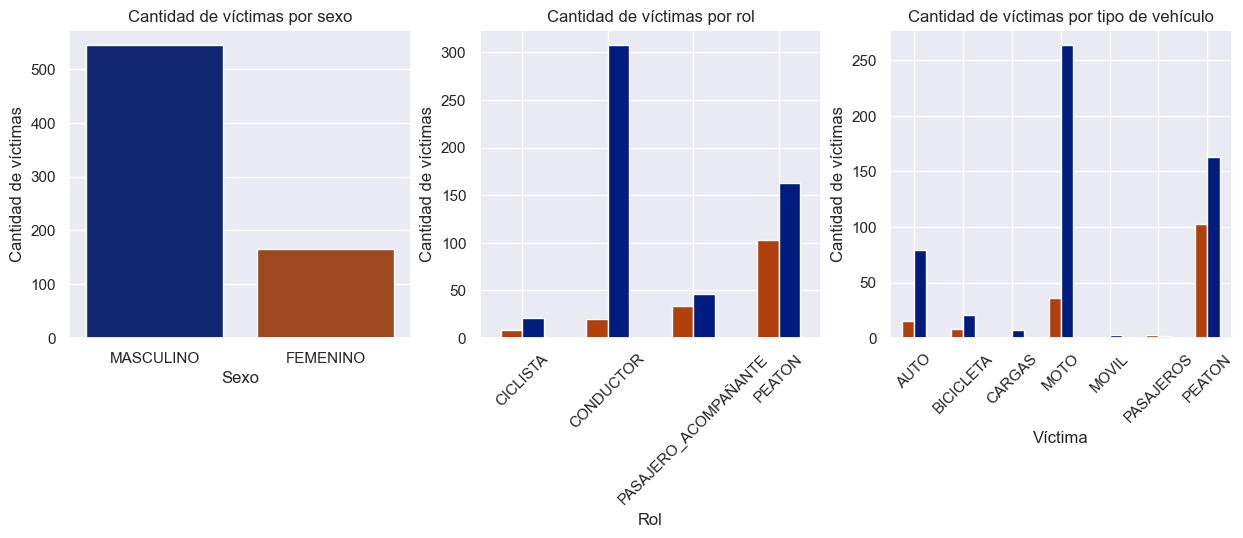

In [28]:
data = homicidiosVictimasDf[homicidiosVictimasDf[['sexo','rol','victima']] != 'SD']
palette = sns.color_palette('dark')
palette = [palette[1], palette[0]]

# Se crea el gráfico
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Gráfico 1: sexo
sns.countplot(data=data, x='sexo', ax=axes[0], palette='dark')
axes[0].set_title('Cantidad de víctimas por sexo')
axes[0].set_xlabel('Sexo')
axes[0].set_ylabel('Cantidad de víctimas')

# Gráfico 2: Rol
dataRol = data.groupby(['rol', 'sexo']).size().unstack(fill_value=0)
dataRol.plot(kind='bar', ax=axes[1], color=palette)
axes[1].set_title('Cantidad de víctimas por rol')
axes[1].set_xlabel('Rol')
axes[1].set_ylabel('Cantidad de víctimas')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend().set_visible(False)
    
# Gráfico 3: Tipo de vehículo
dataVictima = data.groupby(['victima', 'sexo']).size().unstack(fill_value=0)
dataVictima.plot(kind='bar', ax=axes[2], color=palette)
axes[2].set_title('Cantidad de víctimas por tipo de vehículo')
axes[2].set_xlabel('Víctima')
axes[2].set_ylabel('Cantidad de víctimas')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend().set_visible(False)

# Se muestran los gráficos
plt.show()

La disparidad en el número de víctimas masculinas (Aproximadamente 77%) en comparación con las femeninas es evidente, especialmente entre los conductores, donde la proporción de hombres es significativamente mayor. Resulta notable que las motocicletas presenten la mayor proporción de accidentes, con una destacada incidencia de víctimas masculinas. Los peatones, por otro lado, constituyen el grupo con el mayor número de fallecimientos en accidentes, con una proporción más pronunciada de víctimas masculinas, aunque la diferencia es menos marcada.

<h4>Relación Víctima/Acusado-Edad

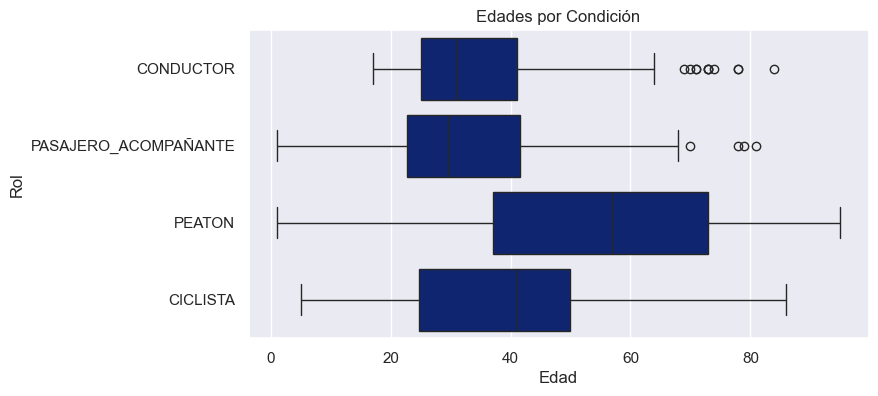

In [29]:
data = homicidiosVictimasDf[homicidiosVictimasDf[['rol','edad']] != 'SD']
data['edad'] = data['edad'].dropna().astype(int)

plt.figure(figsize=(8, 4))
sns.boxplot(y='rol', x='edad',data = data)
plt.title('Edades por Condición')
plt.ylabel('Rol')
plt.xlabel('Edad')
plt.show()

Las edades promedio de los conductores de automóviles y los pasajeros son similares, alrededor de los 35 años. La edad mínima de los conductores es aproximadamente 18 años, lo cual tiene sentido considerando la edad necesaria para conseguir una licencia de conducir en argentina es de 17 años. Sin embargo, como es de esperarse en los demás roles es posible encontrar víctimas de edades más tempranas, pues incluyen la presencia de niños que están siendo trasladados.

En el caso de los peatones, se observa una mayor dispersión en las edades, abarcando desde niños pequeños hasta adultos mayores cercanos a los 90 años.

Aunque se identifican algunos valores atípicos en las edades de conductores y pasajeros acompañantes, estos casos especiales son considerados esperables en el conjunto de datos.

Finalmente, se examina la relación entre la edad y los distintos vehículos que ocupaban las víctimas o si eran peatones, lo que puede arrojar información valiosa sobre la distribución de edades en diferentes situaciones de accidentes.

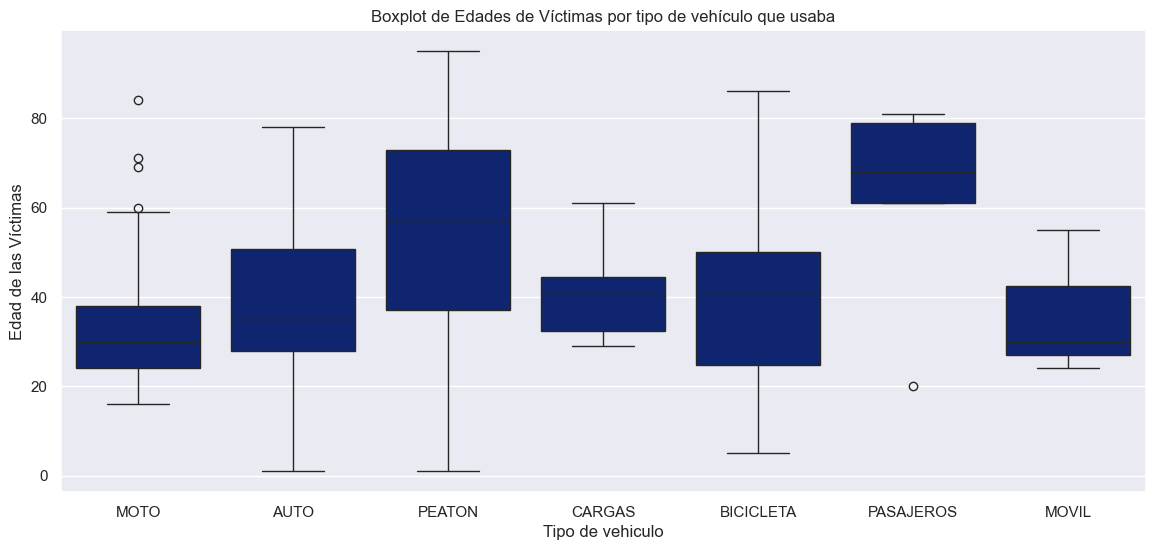

In [30]:
data = homicidiosVictimasDf[homicidiosVictimasDf[['victima','edad']] != 'SD']
data['edad'] = data['edad'].dropna().astype(int)

plt.figure(figsize=(14, 6))
sns.boxplot(x='victima', y='edad', data=data)
    
plt.title('Boxplot de Edades de Víctimas por tipo de vehículo que usaba')
plt.xlabel('Tipo de vehiculo') ; plt.ylabel('Edad de las Víctimas')
     
plt.show()

Se observa una notable dispersión en las edades de las víctimas fallecidas según el vehículo que ocupaban en el momento del incidente. La mayor variabilidad se observa en el caso de las víctimas peatones, donde se presenta un rango más amplio de edades en comparación con las demás categorías.

Las víctimas de mayor edad tienden a estar más concentradas cuando son pasajeros, mientras que las víctimas más jóvenes son más frecuentes en las categorías de motocicletas y otros vehículos. Este patrón puede proporcionar información valiosa sobre las diferencias en la distribución de edades en distintas situaciones de accidentes, ayudando a identificar áreas de mayor riesgo y posibles medidas preventivas.